<center><h4>Principal Component Analysis (Absenteeism)</h4></center>

<br>**Problem statement:**
<br>You have a dataset containing the record of absences in a Brazilian courier company. Perform PCA on this dataset to
<br> (a) Plot the 2 major components on a scatter plot
<br> (b) Show the variance distribution for all the components

*Import required modules*

In [1]:
import pandas as pd                               #Load datasets
from sklearn.preprocessing import StandardScaler  #Standardization
from sklearn.decomposition import PCA             #PCA function
import matplotlib.pyplot as plt                   #Plot outputs

*Data import & cleansing*

In [2]:
#Load CSV file into a dataframe
AbsenceDf = pd.read_csv("Absenteeism.csv", delimiter=";" )

#Preview the data
AbsenceDf.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
#Check for datatype & missing values in dataframe
AbsenceDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
#Select relevant variables
AbsenceDf_reduced = AbsenceDf[['Reason for absence','Day of the week','Transportation expense', 'Distance from Residence to Work','Service time','Age','Disciplinary failure','Education','Son','Absenteeism time in hours']]

#Standardize Absence dataframe
AbsenceDf_reduced = StandardScaler().fit_transform(AbsenceDf_reduced)

# Display standardized array as a dataframe
pd.DataFrame(AbsenceDf_reduced)

,0,1,2,3,4,5,6,7,8,9
0,0.804938,-0.643947,1.011408,0.429556,0.101770,-0.532868,-0.239046,-0.433857,0.893723,-0.219511
1,-2.280124,-0.643947,-1.544379,-1.121694,1.242825,2.092860,4.183300,-0.433857,-0.017234,-0.519767
2,0.448970,0.059924,-0.632665,1.441240,1.242825,0.239405,-0.239046,-0.433857,-0.928191,-0.369639
3,-1.449530,0.763796,0.861947,-1.661258,0.329981,0.393859,-0.239046,-0.433857,0.893723,-0.219511
4,0.448970,0.763796,1.011408,0.429556,0.101770,-0.532868,-0.239046,-0.433857,0.893723,-0.369639
...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,-0.643947,1.011408,0.429556,0.101770,-0.532868,-0.239046,-0.433857,0.893723,0.080744
736,-0.974905,-0.643947,0.204318,-1.256585,0.329981,0.084950,-0.239046,2.538869,-0.017234,-0.219511
737,-2.280124,-0.643947,-1.544379,-1.054248,0.101770,0.548314,-0.239046,-0.433857,-0.017234,-0.519767
738,-2.280124,0.059924,0.144533,0.362110,0.329981,0.393859,-0.239046,-0.433857,0.893723,-0.519767


*Run PCA Algorithm for 2 components*

In [5]:
#Run the PCA algorithm
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(AbsenceDf_reduced)
AbsenceDfPCA = pd.DataFrame(data = principalComponents,
                            columns = ['PC1', 'PC2'])

#Explain the variance of the components
pca.explained_variance_ratio_

#Total variance % emplained by components
print("% variance explained by PC1 + PC2:", round((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] / 1)*100,2))

% variance explained by PC1 + PC2: 36.56


*Plot components*

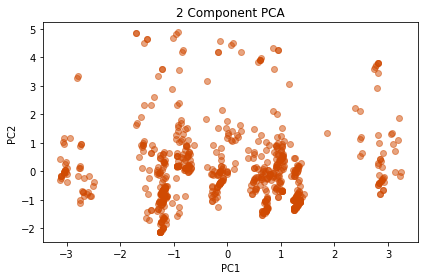

In [6]:
#Create plot components
fig, ax = plt.subplots()

#Scatterplot
plt.scatter(AbsenceDfPCA['PC1'], AbsenceDfPCA['PC2'], color='#D04A02', alpha= 0.5)

#Set plot labels
ax.set_xlabel(r'PC1', fontsize=10)
ax.set_ylabel(r'PC2', fontsize=10)
ax.set_title('2 Component PCA')

#Customize plot
#ax.grid(True)
fig.tight_layout()

#Display plot
plt.show()

*Selecting the number of components*

In [7]:
#Run the PCA algorithm for 10 components
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(AbsenceDf_reduced)
AbsenceDfPCA = pd.DataFrame(data = principalComponents,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

#Explain the variance of the components
pca.explained_variance_ratio_

array([0.19545519, 0.17012369, 0.15928411, 0.11931625, 0.10142963,
       0.08072274, 0.06629622, 0.04769017, 0.03674603, 0.02293596])

*Plot the variance evolution per component*

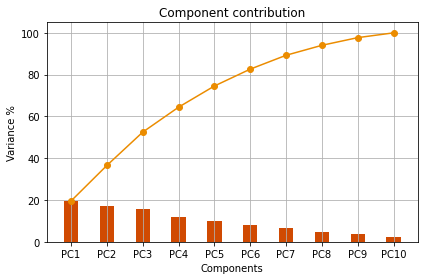

In [8]:
#Prepare the variables for the plot
components = list(AbsenceDfPCA.columns)
variances = list(pca.explained_variance_ratio_*100)

#Create the cumulative variance
cumulative_variance = list()
temp = 0
for i in variances:
    temp = round((i+temp),2)
    cumulative_variance.append(temp)

#Create plot components
fig, ax = plt.subplots()
 
# creating the bar & line plots
plt.bar(components, variances, color ='#D04A02', width = 0.4)
plt.plot(components, cumulative_variance, marker = 'o', color = '#EB8C00')

#Set plot labels
ax.set_xlabel(r'Components', fontsize=10)
ax.set_ylabel(r'Variance %', fontsize=10)
ax.set_title('Component contribution')

#Customize plot
ax.grid(True)
fig.tight_layout()

plt.show()

*Run PCA on the full dataset*

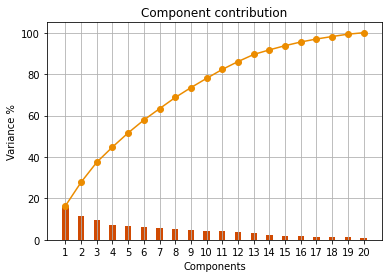

In [12]:
AbsenceDf = StandardScaler().fit_transform(AbsenceDf)

#Run the PCA algorithm for 20 components
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(AbsenceDf)

#Prepare the variables for the plot
components = list()
for i in range(1,21):
    components.append(str(i))
variances = list(pca.explained_variance_ratio_*100)

#Create the cumulative variance
cumulative_variance = list()
temp = 0
for i in variances:
    temp = round((i+temp),2)
    cumulative_variance.append(temp)

#Create plot components
fig, ax = plt.subplots()
 
# creating the bar & line plots
plt.bar(components, variances, color ='#D04A02', width = 0.4)
plt.plot(components, cumulative_variance, marker = 'o', color = '#EB8C00')

#Set plot labels
ax.set_xlabel(r'Components', fontsize=10)
ax.set_ylabel(r'Variance %', fontsize=10)
ax.set_title('Component contribution')

#Customize plot
ax.grid(True)
#fig.tight_layout()

plt.show()